In [96]:
import numpy as np                               # vectors and matrices
import matplotlib.pyplot as plt                  # plots

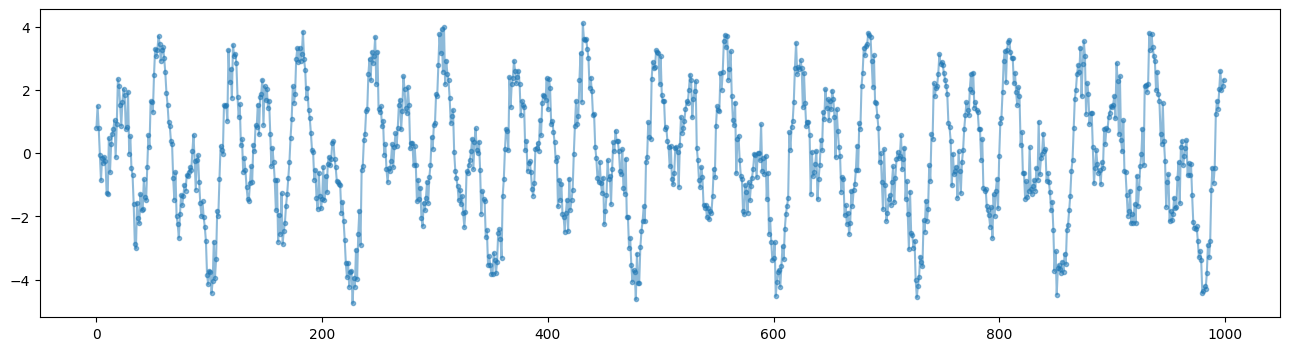

In [97]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def generate_periodic_timeseries(N, T):
    """
    Generate N periodic time series of length T
    """
    res = []
    for i in range(N):
        tres = []
        for j in range(T):
           tres.append(np.sin(j/20)+np.cos(j/10)*1.5-np.sin(j/5+i)*2 + np.random.normal(loc=0, scale=0.5))
        res.append(tres)
    return np.array(res)

def draw(series):
    plt.figure(figsize=(16, 4))
    for i in range(len(series)):
        plt.plot(series[i], alpha=0.5, marker='.')
    plt.show()

X = generate_periodic_timeseries(1, 1000)
X = X.reshape(-1)
draw(X.reshape(1, -1))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27570D+00    |proj g|=  1.29564D-01

At iterate    5    f=  1.13820D+00    |proj g|=  2.00452D-01

At iterate   10    f=  1.03267D+00    |proj g|=  3.75282D-02

At iterate   15    f=  1.03139D+00    |proj g|=  8.32664D-03

At iterate   20    f=  1.02840D+00    |proj g|=  2.90394D-03

At iterate   25    f=  1.02800D+00    |proj g|=  5.65299D-03

At iterate   30    f=  1.02596D+00    |proj g|=  3.22146D-02

At iterate   35    f=  1.01973D+00    |proj g|=  2.69956D-02

At iterate   40    f=  9.76316D-01    |proj g|=  5.73480D-02

At iterate   45    f=  9.52503D-01    |proj g|=  1.34441D-01

At iterate   50    f=  9.25392D-01    |proj g|=  4.64502D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

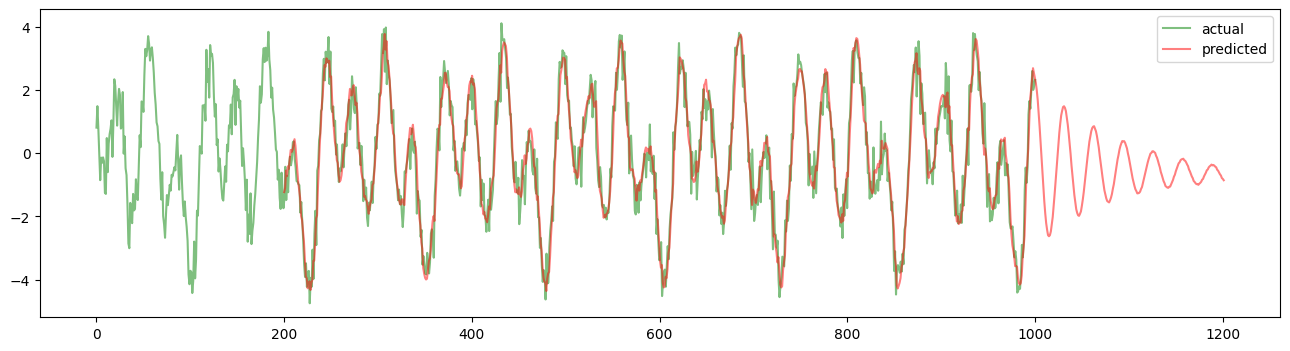

In [98]:
import statsmodels

model = statsmodels.tsa.statespace.sarimax.SARIMAX(X, order=(2, 1, 3), seasonal_order=(1, 1, 1, 5))
res = model.fit()

predicted = res.predict(200, 1200)
plt.figure(figsize=(16, 4))
plt.plot(np.linspace(0, 1000, 1000), X, label='actual', alpha=0.5, color='green')
plt.plot(np.linspace(200, 1201, 1001), predicted, label='predicted', alpha=0.5, color='red')
plt.legend()
plt.show()